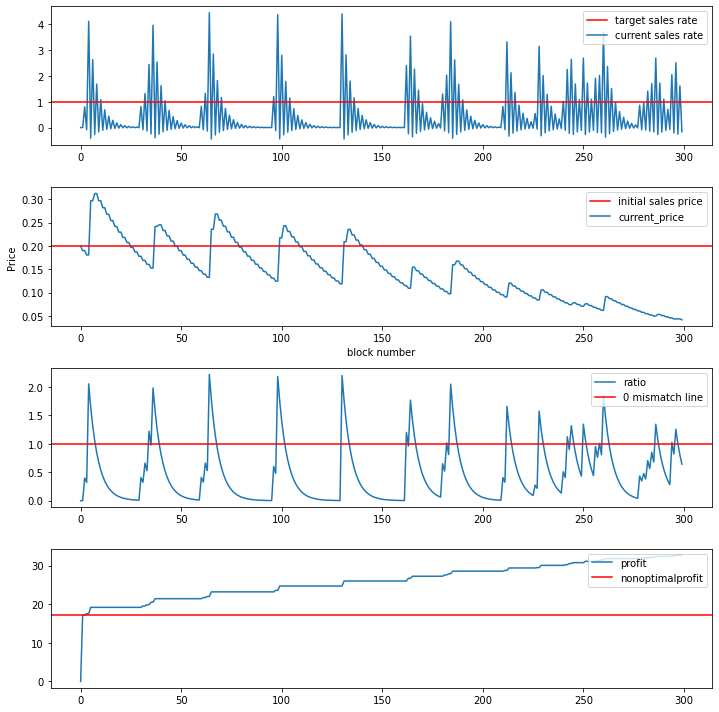

In [1]:
from Algo import *
import matplotlib.pyplot as plt
import random
import numpy as np


class Simulator:
    customers = []
    def __init__(self, pid, simblocklength):
        self.pid = pid
        self.simblocklength = simblocklength
    
    def initialize_customers(self):
        for i in range(200):
            self.customers.append(random.random() / 3)

    def initialize_random_sales_blocks(self):
        self.initialize_customers()
        blocksarray = []
        wtsarray = []
        blockslist = []
        profitlist = []
        pricelist = []
        ratiolist = []
        nonoptimalprofit = 0
        totalsales = 0
        for k in range(len(self.customers)):
            if (self.customers[k] >= self.pid.initial_price):
                nonoptimalprofit += self.pid.initial_price
        for i in range(self.simblocklength):
            blocksarray.append(block(i))
            self.pid.block_arr = blocksarray
            for j in range(len(self.customers)):
                if (self.customers[j] >= self.pid.get_price()):
                    blocksarray[i].add_sales()
                    self.customers[j] -= self.pid.get_price()
                    totalsales += 1
            profitlist.append(self.pid.get_profit())
            wtsarray.append(self.pid.calc_wts(blocksarray[i].sales))
            pricelist.append(self.pid.get_price())
            ratiolist.append(self.pid.check_rate())
        for i in range(self.simblocklength):
            blockslist.append(blocksarray[i].index)
        return blockslist, wtsarray, pricelist, ratiolist, profitlist, nonoptimalprofit

    def plot_sim(self, price, blocks_arr, wts, ratiolist, profitlist, nonoptimalprofit):
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 10))

        wts_line, = ax1.plot(blocks_arr, wts)
        target_wts_line = ax1.axhline(
            y=self.pid.goal_sales_per_block, color='r')

        ax1.set_xlabel = ("block number")
        ax1.set_ylabel = ("WTS")

        ax1.legend([target_wts_line, wts_line], [
                   'target sales rate', 'current sales rate'], loc='upper right')

        price_line, = ax2.plot(blocks_arr, price)
        initial_price_line = ax2.axhline(y=self.pid.initial_price, color='r')

        ax2.set_xlabel("block number")
        ax2.set_ylabel("Price")

        ax2.legend([initial_price_line, price_line], [
                   'initial sales price', 'current_price'], loc='upper right')

        ratio_line, = ax3.plot(blocks_arr, ratiolist)
        one_line = ax3.axhline(y = 1.0, color='r')
        ax3.set_xlabel = ("block number")
        ax3.set_ylabel = ("ratio")
        ax3.legend([ratio_line, one_line], ["ratio", "0 mismatch line"], loc='upper right')

        profit_line, = ax4.plot(blocks_arr, profitlist)
        nonoptimalprofit_line = ax4.axhline(y = nonoptimalprofit, color='r')
        ax4.set_xlabel = ("block number")
        ax4.set_ylabel = ("total profit")
        ax4.legend([profit_line, nonoptimalprofit_line], ["profit", 'nonoptimalprofit'], loc='upper right')
        fig.tight_layout()
        plt.show()

    def plot_simulation(self):
        self.pid.reset()
        blocks_arr, wts_array, pricelist, ratiolist, profitlist, nonoptimalprofit = self.initialize_random_sales_blocks()
        self.plot_sim(pricelist, blocks_arr, wts_array, ratiolist, profitlist, nonoptimalprofit)


algo = AlgoClass(1, 0.2, 2)
simulation = Simulator(algo, 300)
simulation.plot_simulation()


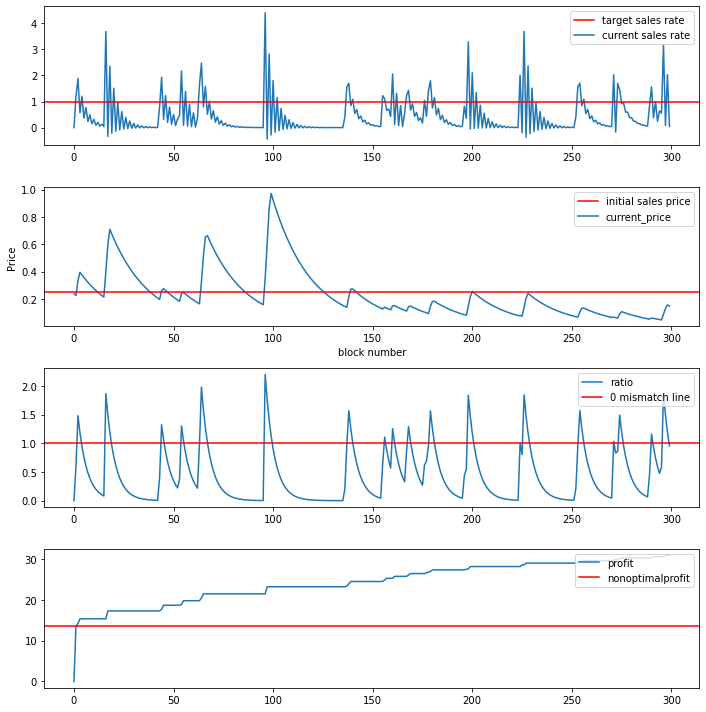

In [2]:
algo2 = AlgoClass(1, 0.25, 1)
simulation2 = Simulator(algo2, 300)
simulation2.plot_simulation()